# [Kaggle Restaurant Revenue Prediction](https://www.kaggle.com/c/restaurant-revenue-prediction)

## Predict annual restaurant sales based on objective measurements

## Import libraries and data; explore the data

Let's begin by importing the Python libraries and data that we'll need:

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Now for a bit of exploratory data analysis so we can get to know our data:

In [3]:
display(train[:10])

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
5,5,02/12/2010,Ankara,Big Cities,FC,6,6.0,4.5,7.5,8,...,5.0,0,0,0,0,0,0,0,0,5017319.0
6,6,10/11/2010,İstanbul,Big Cities,IL,2,3.0,4.0,4.0,1,...,3.0,4,5,2,2,3,5,4,4,5166635.0
7,7,06/21/2011,İstanbul,Big Cities,IL,4,5.0,4.0,5.0,2,...,2.0,0,0,0,0,0,0,0,0,4491607.0
8,8,08/28/2010,Afyonkarahisar,Other,IL,1,1.0,4.0,4.0,1,...,3.0,4,5,5,3,4,5,4,5,4952497.0
9,9,11/16/2011,Edirne,Other,IL,6,4.5,6.0,7.5,6,...,2.5,0,0,0,0,0,0,0,0,5444227.0


In [4]:
display(test[:10])

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0
5,5,11/29/2007,Eskişehir,Other,FC,4,4.5,5.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
6,6,11/05/2008,Rize,Other,FC,4,2.0,4.0,4.0,2,...,1.0,3.0,3,5,4,1,2,0,0,0
7,7,12/03/2013,Ankara,Big Cities,IL,2,5.0,4.0,5.0,2,...,3.0,1.0,3,0,0,0,3,0,4,4
8,8,05/30/2006,İstanbul,Big Cities,IL,5,4.0,4.0,4.0,1,...,5.0,1.0,0,4,0,0,3,5,0,0
9,9,01/20/2012,İstanbul,Big Cities,IL,15,7.5,6.0,3.0,4,...,1.0,2.5,20,2,0,2,24,4,0,3


In [5]:
train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [6]:
test.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,4.088030,4.428085,4.215325,4.396025,1.989590,2.881900,5.30051,4.93100,5.251380,...,3.233785,3.084000,2.083300,1.193330,1.942640,0.987430,2.108670,1.832830,1.968890,0.973500
std,28867.657797,2.812963,1.428865,0.842161,1.035827,1.065314,1.531429,2.17858,1.71849,1.702632,...,2.136694,1.783927,4.309479,2.307944,3.971298,1.534808,4.685414,3.228769,3.805773,1.677267
min,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.00000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24999.750000,2.000000,3.750000,4.000000,4.000000,1.000000,2.000000,5.00000,4.00000,4.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49999.500000,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.00000,5.00000,5.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74999.250000,4.000000,5.000000,4.000000,5.000000,2.000000,4.000000,5.00000,5.00000,5.000000,...,4.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000
max,99999.000000,15.000000,7.500000,6.000000,7.500000,6.000000,10.000000,10.00000,10.00000,10.000000,...,12.500000,10.000000,25.000000,15.000000,25.000000,6.000000,30.000000,15.000000,20.000000,8.000000


In [7]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [8]:
train.tail()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0
136,136,09/01/2009,İstanbul,Big Cities,FC,4,5.0,3.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,6363241.0


In [9]:
train.sample(5)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
75,75,10/15/2005,İstanbul,Big Cities,FC,5,5.0,4.0,5.0,1,...,0.0,0,0,0,0,0,0,0,0,16549064.0
101,101,09/09/2012,Balıkesir,Other,IL,3,4.0,5.0,4.0,2,...,3.0,5,5,5,5,4,5,5,4,4758476.0
102,102,09/11/2004,Diyarbakır,Other,FC,4,5.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2738052.0
31,31,12/31/2012,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,...,3.0,4,3,3,2,3,4,3,3,2058644.0
125,125,09/01/2010,Trabzon,Other,IL,9,6.0,6.0,6.0,4,...,7.5,20,9,15,4,24,12,16,2,4780607.0


In [10]:
train.keys()

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [11]:
test.keys()

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37'],
      dtype='object')

In [12]:
test['revenue'] = pd.Series([0 for x in range(len(test.index))], index=test.index)

In [13]:
test.keys()

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

## Plot the data

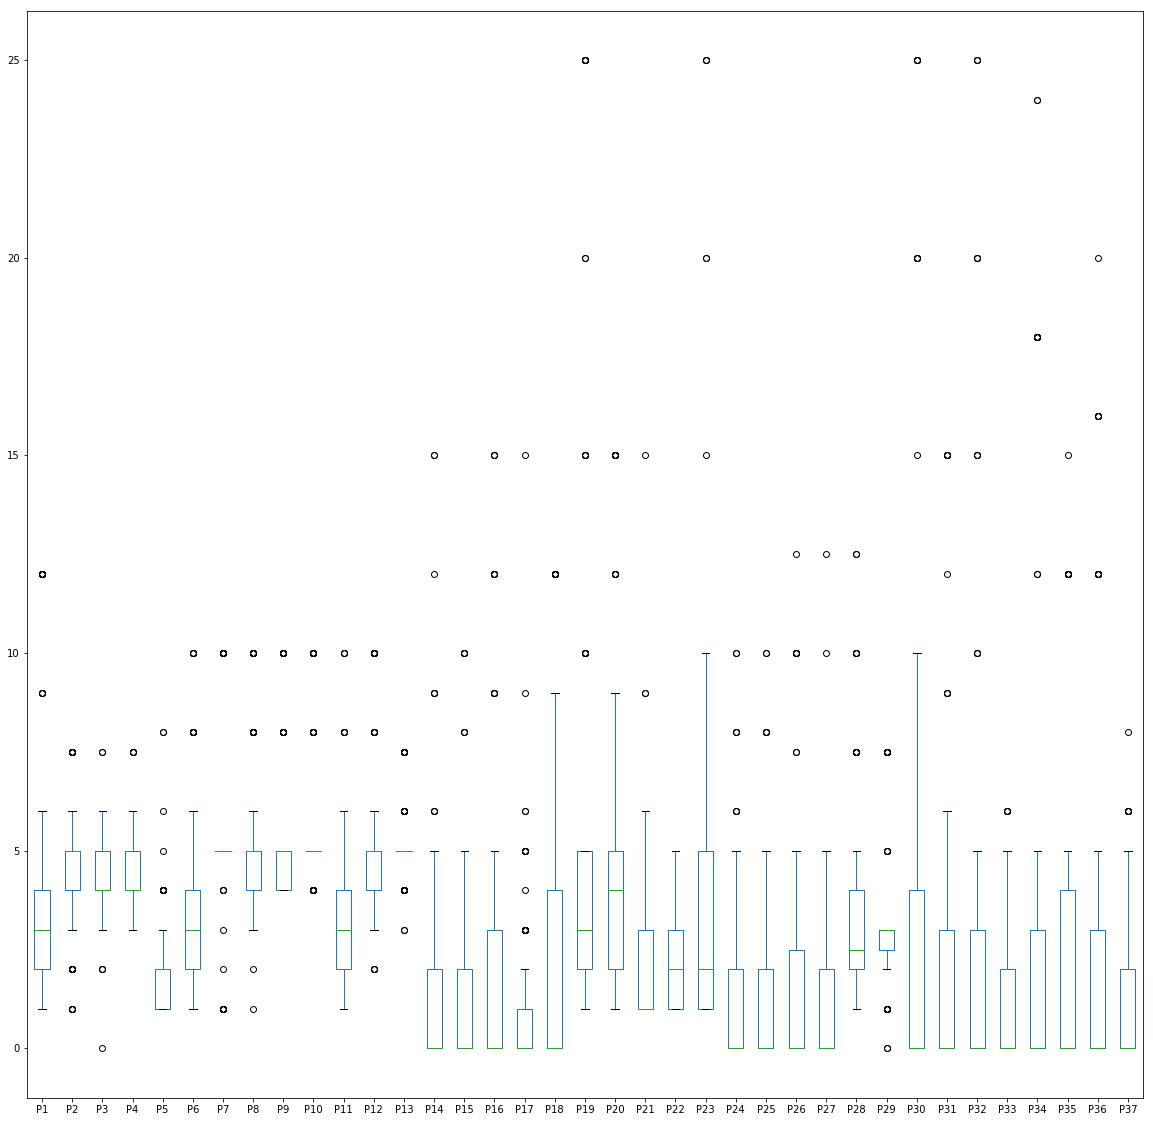

In [14]:
feature_columns = train[['P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37']]
feature_columns.plot.box(figsize=(20, 20))

I'm sure there are more creative and informative ways to plot the data, but for now it's time to move on.

## Try various machine learning algorithms  
Let's try on some algorithms and see how they predict and fit:

### `k`-Nearest Neighbors

#### KNeighborsClassifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
# train['revenue']
# train.iloc[:, -1:].shape
train.iloc[:, 5:].shape

(137, 38)

In [17]:
test_revenue = test['revenue'].ravel()
# test_revenue
train_revenue = train['revenue'].ravel()
train_revenue

array([  5653753.,   6923131.,   2055379.,   2675511.,   4316715.,
         5017319.,   5166635.,   4491607.,   4952497.,   5444227.,
         3745135.,   5161370.,   1734634.,   4807746.,   1999097.,
         3218918.,  19696939.,   8213524.,   5337526.,   2021934.,
         5525735.,   1149870.,   3956086.,   2999068.,   8904084.,
         3778621.,   2267425.,   5435276.,   4705945.,   3447890.,
         3008199.,   2058644.,   3261924.,   2371202.,   4100886.,
         3903884.,   3028267.,   2740687.,   5461700.,   3818055.,
         6836483.,   4554237.,   4952255.,   2732645.,   4264176.,
         3752885.,   4250758.,   7865428.,   7201784.,   8630682.,
         2156098.,   3273041.,   1763231.,   5595267.,   4651866.,
         6941173.,   2390534.,   3258837.,   3004429.,   3600467.,
         3164972.,   4350573.,   5286212.,   1619683.,   2551252.,
         1756069.,   1882131.,   4052733.,   3836721.,   3452382.,
         3982767.,   4136425.,   2525375.,   3347767.,   55008

In [18]:
# knn_clf.fit(train.iloc[:, 5:], train.iloc[:, -1:])
knn_clf.fit(train.iloc[:, 5:], train_revenue)
# knn_clf.fit(train_revenue, train.iloc[:, 5:])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [19]:
result = knn_clf.predict(test.iloc[:, 5:])
# result = knn_clf.predict(test['revenue'])
test['revenue'] = result
test[:10]

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,1149870.0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,1149870.0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,1149870.0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,3.0,0,4,0,0,0,0,0,0,1149870.0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,1149870.0
5,5,11/29/2007,Eskişehir,Other,FC,4,4.5,5.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,1149870.0
6,6,11/05/2008,Rize,Other,FC,4,2.0,4.0,4.0,2,...,3.0,3,5,4,1,2,0,0,0,1149870.0
7,7,12/03/2013,Ankara,Big Cities,IL,2,5.0,4.0,5.0,2,...,1.0,3,0,0,0,3,0,4,4,1149870.0
8,8,05/30/2006,İstanbul,Big Cities,IL,5,4.0,4.0,4.0,1,...,1.0,0,4,0,0,3,5,0,0,1149870.0
9,9,01/20/2012,İstanbul,Big Cities,IL,15,7.5,6.0,3.0,4,...,2.5,20,2,0,2,24,4,0,3,1149870.0


In [20]:
knn_clf.score(test.iloc[:, 5:], test_revenue)

0.0

It appears that `KNeighborsClassifier` is not very well suited to this task, or I just don't understand it well enough for it to be useful in this application.  
Perhaps I'll get better results from `KNeighborsRegressor`.

#### KNeighborsRegressor

[According to the documentation](http://scikit-learn.org/stable/modules/neighbors.html#regression):  
"Neighbors-based regression can be used in cases where the data labels are continuous rather than discrete variables.  
The label assigned to a query point is computed based the mean of the labels of its nearest neighbors."  

In [21]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train.iloc[:, 5:], train_revenue)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [22]:
result = knr.predict(test.iloc[:, 5:])
print(result)
test['revenue'] = result
test[:10]

[ 1346684.  1346684.  1346684. ...,  1346684.  1346684.  1346684.]


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,1346684.0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,1346684.0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,1346684.0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,3.0,0,4,0,0,0,0,0,0,1346684.0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,1346684.0
5,5,11/29/2007,Eskişehir,Other,FC,4,4.5,5.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,1346684.0
6,6,11/05/2008,Rize,Other,FC,4,2.0,4.0,4.0,2,...,3.0,3,5,4,1,2,0,0,0,1346684.0
7,7,12/03/2013,Ankara,Big Cities,IL,2,5.0,4.0,5.0,2,...,1.0,3,0,0,0,3,0,4,4,1346684.0
8,8,05/30/2006,İstanbul,Big Cities,IL,5,4.0,4.0,4.0,1,...,1.0,0,4,0,0,3,5,0,0,1346684.0
9,9,01/20/2012,İstanbul,Big Cities,IL,15,7.5,6.0,3.0,4,...,2.5,20,2,0,2,24,4,0,3,1346684.0


In [23]:
knr.score(test.iloc[:, 5:], test_revenue)

0.0

That didn't go very well, either.  
I'm thinking that I am not correctly applying the $k$-neighbors algorithms correctly.  
I'll see if plotting the results helps:  

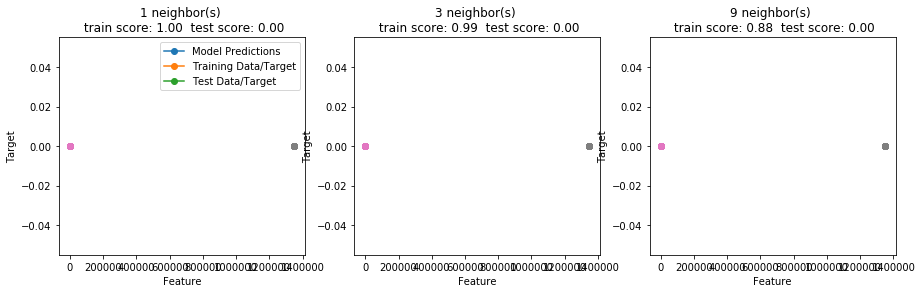

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # Make predicitions using 1, 3, and 9 neighbors:
    knr = KNeighborsRegressor(n_neighbors=n_neighbors)
    knr.fit(train.iloc[:, 5:], train_revenue)
    # ax.plot(train.iloc[:, 5:], train_revenue, marker='.')
    ax.plot(test.iloc[:, 5:], test_revenue, marker='o')
    ax.set_title(
        "{} neighbor(s) \n train score: {:.2f}  test score: {:.2f}".format(
            n_neighbors, knr.score(train.iloc[:, 5:], train_revenue),
            knr.score(test.iloc[:, 5:], test_revenue)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model Predictions", "Training Data/Target", "Test Data/Target"], loc="best")